<span style="color:green">**Поздравляю, твой проект принят!**</span>

Лидия, отличная работа, получился качественный аналитический отчет. Поставленные задачи были успешно выполнены! Недочёты исправлены! Надеюсь, ревью было полезным:) Желаю успехов в учебе и следующих проектах!

Новые комментарии имеют метку `v2`.

<span style="color:purple">**Привет, Лидия!**</span>

Меня зовут **Василий** и я - ревьювер, буду проверять твой проект.

Если не против, я буду обращаться к тебе на "ТЫ". Если это неприемлемо, обязательно напиши мне в комментариях – мы прейдем на "ВЫ".

Спасибо, что прислала проект, вижу, что ты хорошо постаралась над ним. В тетради ты сможешь найти мои комментарии. Пострайся учесть их в ходе исправления этого и выполнения дальнейших проектов.

Обрати внимание, я буду выделять свои комментарии цветом, в зависимости от того, какие действия, важность и особенности тебя ждут в процессе проверки.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Такими комментариями я буду помечать хорошо проделаную работу, а так же хорошо проделаную работу над ошибками.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
После таких комментариев ничего исправлять не нужно, но я дам рекомендации на будущее и подскажу, что можно улучшить.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Если ты видишь такой комментарий, значит я указываю тебе на недочёт, его нужно исправить. Без такого исправления я не приму твою работу:)
</div>

**Пожалуста, не удаляй мои комментарии. При повторной проверке, я буду ориентироваться на них.**

<span style="color:blue"> Можешь под моими комментариями оставлять свои, в которых опиши свои исправления. Это облегчит процесс проверки и мне, и тебе:) Например, вот так:</span>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>

</div>

# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Хорошее введение, понятно чему посвящен твой проект и какие этапы он содержит👍
</div>

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from math import ceil
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Все используемые библиотеки лучше импортировать в первой ячейке согласно PEP8. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Исправила
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
👍
</div>

In [2]:
sessions_history=pd.read_csv("/datasets/sessions_project_history.csv")

In [3]:
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
unique_sessions = sessions_history.groupby('user_id')['session_id'].nunique().reset_index()

In [5]:
max_sessions_user = unique_sessions.loc[unique_sessions['session_id'].idxmax()]['user_id']

In [6]:
user_data = sessions_history[sessions_history['user_id'] == max_sessions_user]

In [7]:
print(f"Пользователь с максимальным количеством сессий: {max_sessions_user}")
print(f"Количество уникальных сессий: {unique_sessions.loc[unique_sessions['user_id'] == max_sessions_user, 'session_id'].values[0]}")
print("\nВсе сессии пользователя:")
display(user_data)

Пользователь с максимальным количеством сессий: 10E0DEFC1ABDBBE0
Количество уникальных сессий: 10

Все сессии пользователя:


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Данные можно вывести в табличном виде, использя display вместо print.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Исправила
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Так лучше👍
</div>

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [8]:
# Агрегация данных по дням
daily_stats = sessions_history.groupby(['session_date', 'user_id', 'registration_flag']).size().reset_index()
daily_stats = daily_stats.groupby(['session_date', 'registration_flag']).agg({
    'user_id': 'nunique'
}).reset_index()
print(daily_stats)

   session_date  registration_flag  user_id
0    2025-08-11                  0     3750
1    2025-08-11                  1      169
2    2025-08-12                  0     5720
3    2025-08-12                  1      336
4    2025-08-13                  0     8025
..          ...                ...      ...
83   2025-09-21                  1       87
84   2025-09-22                  0      478
85   2025-09-22                  1       68
86   2025-09-23                  0      285
87   2025-09-23                  1       32

[88 rows x 3 columns]


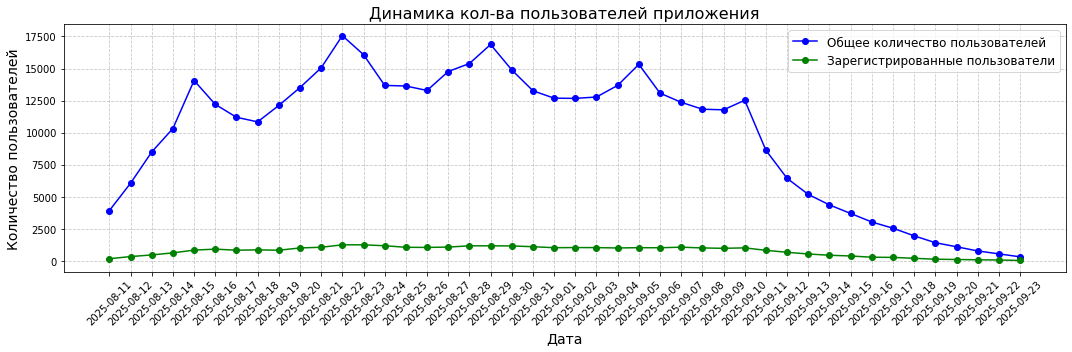

In [9]:
# Создаем отдельные датафреймы для зарегистрированных и всех пользователей
registered_users = daily_stats[daily_stats['registration_flag'] == True].groupby('session_date').agg({'user_id': 'sum'}).reset_index()
registered_users.columns = ['date', 'registered_users']

all_users = daily_stats.groupby('session_date').agg({'user_id': 'sum'}).reset_index()
all_users.columns = ['date', 'total_users']

# Объединяем данные
metrics = pd.merge(all_users, registered_users, on='date', how='outer')

# Построение графика
plt.figure(figsize=(15, 5))

# График общего числа пользователей
plt.plot(metrics['date'], metrics['total_users'], 
         label='Общее количество пользователей', 
         marker='o', linestyle='-', color='blue')

# График зарегистрированных пользователей
plt.plot(metrics['date'], metrics['registered_users'], 
         label='Зарегистрированные пользователи', 
         marker='o', linestyle='-', color='green')

# Настройка графика
plt.title('Динамика кол-ва пользователей приложения', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()

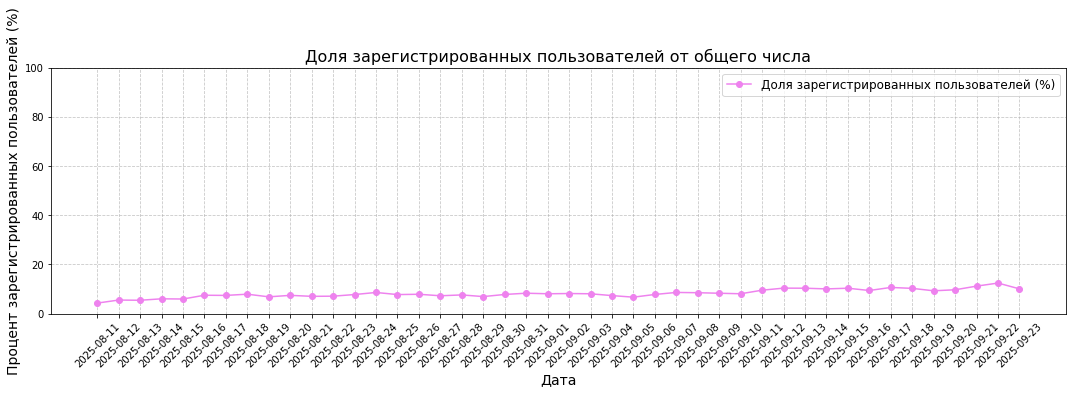

In [10]:

# Рассчитываем долю зарегистрированных пользователей
metrics['registration_rate'] = (metrics['registered_users'] / metrics['total_users']) * 100

# Построение графика
plt.figure(figsize=(15, 5))

# График доли зарегистрированных пользователей
plt.plot(metrics['date'], metrics['registration_rate'], 
         label='Доля зарегистрированных пользователей (%)', 
         marker='o', linestyle='-', color='violet')

# Настройка отображения
plt.title('Доля зарегистрированных пользователей от общего числа', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Процент зарегистрированных пользователей (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100%
plt.xticks(rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Отличные графики👍
</div>

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

   pages_viewed  sessions_count
0             1           29160
1             2          105536
2             3          166690
3             4          105569
4             5           26288
5             6            2589
6             7              92


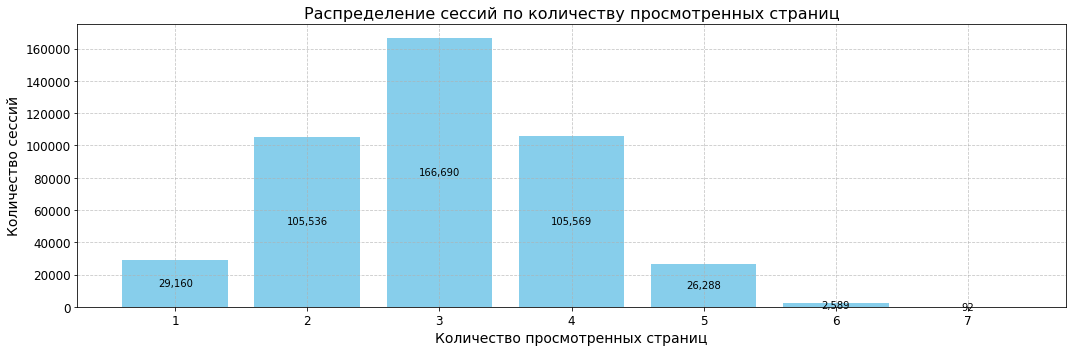

In [11]:
# Подсчет количества сессий по количеству просмотренных страниц
page_views = sessions_history.groupby('page_counter').agg({
    'session_id': 'nunique'
}).reset_index()

# Переименование столбцов для наглядности
page_views.columns = ['pages_viewed', 'sessions_count']

# Сортировка по количеству просмотренных страниц
page_views = page_views.sort_values(by='pages_viewed')

# Вывод результатов
print(page_views)

# Визуализация результатов
plt.figure(figsize=(15, 5))
bars = plt.bar(page_views['pages_viewed'], page_views['sessions_count'], color='skyblue')

plt.title('Распределение сессий по количеству просмотренных страниц', fontsize=16)
plt.xlabel('Количество просмотренных страниц', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Размещение значений внутри столбцов
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # точное положение по X
        bar.get_height() / 2,               # середина высоты столбца
        f'{int(bar.get_height()):,}',
        ha='center', 
        va='center', 
        color='black',
        fontsize=10
    )

plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Данные собраны оптимальным способом, график наглядно демонстрирует распределение сессий в порядке количества просмотренных страниц👍
    
Здорово, что уделяешь внимание оформлению графиков.
    
Предлагаю изучить интересные методы по визуализации. Прикрепляю несколько интересных ссылок:
   
https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
</div>
</div>

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

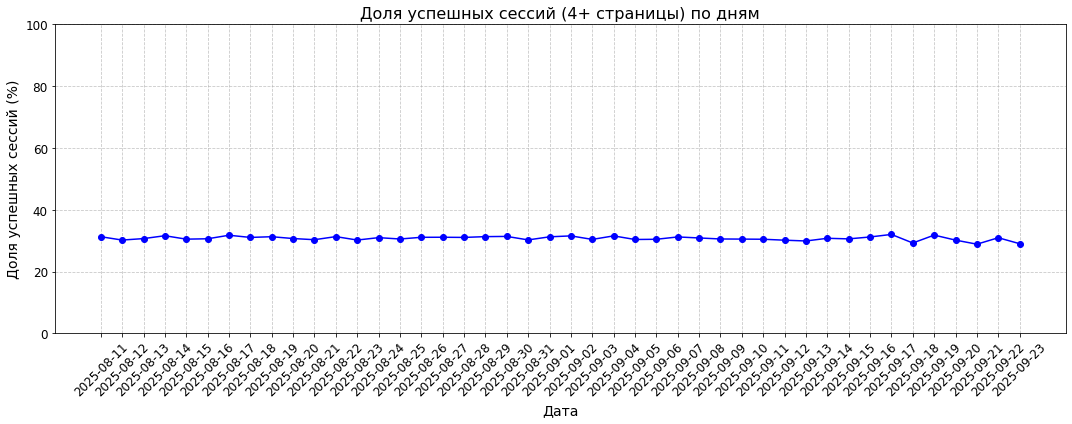

In [12]:
# Создаем новый столбец good_session
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

# Группируем данные по дням и считаем средние значения
daily_good_sessions = sessions_history.groupby('session_date').agg({
    'good_session': 'mean',  # среднее значение доли успешных сессий
    'session_id': 'nunique'  # общее количество сессий для проверки
}).reset_index()

# Переименовываем столбцы
daily_good_sessions.columns = ['date', 'success_rate', 'total_sessions']

# Строим график
plt.figure(figsize=(15, 6))
plt.plot(daily_good_sessions['date'], 
         daily_good_sessions['success_rate'] * 100,  # переводим в проценты
         marker='o',
         linestyle='-',
         color='blue')

plt.title('Доля успешных сессий (4+ страницы) по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Доля успешных сессий (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # ограничиваем ось Y от 0 до 100%
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Всё верно👍
</div>

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

О какой метрике идёт речь? Как она будет учтена в формулировке гипотез?

Сформулируйте нулевую и альтернативную гипотезы:

Нулевая гипотеза (H0):
Новый алгоритм рекомендаций не приведет к статистически значимому увеличению среднего времени просмотра контента на пользователя за сессию по сравнению с текущим алгоритмом.

Альтернативная гипотеза (H1):
Новый алгоритм рекомендаций приведет к статистически значимому увеличению среднего времени просмотра контента на пользователя за сессию по сравнению с текущим алгоритмом.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Гипотезы верно сформулированы👍
</div>

#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [13]:

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p1 = 0.3 # Базовый уровень доли
mde = 0.03 * p1  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p1, p1 + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Верно👍
</div>

#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [14]:

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users =round(all_users['total_users'].mean(),0)

# Размер выборки для всего теста (обе группы)
total_sample_size = sample_size * 2 

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(total_sample_size / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней.")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.0 пользователей в день составит 9 дней.


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
При расчёте длительности теста не учитывается, что в тесте участвуют две группы.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Исправила
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Верно👍
</div>

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [15]:
sessions_test_part=pd.read_csv('/datasets/sessions_project_test_part.csv')

In [16]:
# Выберем день для анализа (первый день тестирования)
# Найдем минимальную дату в данных
min_date = sessions_test_part['session_date'].min()

# Отфильтруем данные только по первому дню
day_sessions = sessions_test_part[
    sessions_test_part['session_date'] == min_date
]

# Подсчитаем уникальных пользователей в каждой группе
unique_users_per_group = day_sessions.groupby('test_group')['user_id'].nunique()

# Выведем результат
print("\nКоличество уникальных пользователей по группам за", min_date)
print(unique_users_per_group)


Количество уникальных пользователей по группам за 2025-10-14
test_group
A    1477
B    1466
Name: user_id, dtype: int64


Количество пользователей в группе A: 1477
Количество пользователей в группе B: 1466
Процентная разница между группами: 0.74%


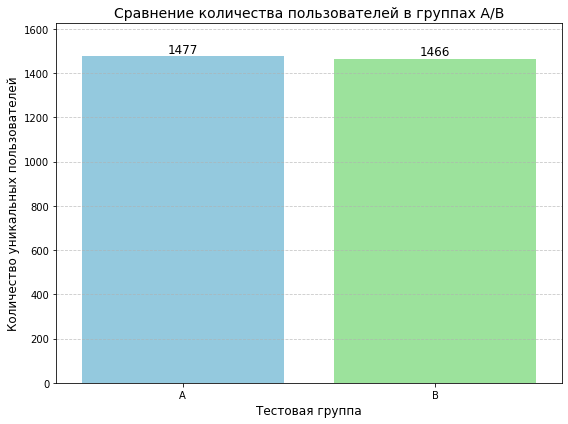

In [17]:
# Сначала найдем количество уникальных пользователей в каждой группе
unique_users = sessions_test_part.groupby('test_group')['user_id'].nunique()

# Извлечем значения для групп A и B
group_A = unique_users['A']
group_B = unique_users['B']

# Рассчитаем процентную разницу
percentage_diff = 100 * (abs(group_A - group_B) / group_A)

print(f"Количество пользователей в группе A: {group_A}")
print(f"Количество пользователей в группе B: {group_B}")
print(f"Процентная разница между группами: {percentage_diff:.2f}%")

# Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(
    x=unique_users.index,
    y=unique_users.values,
    palette=['skyblue', 'lightgreen'],
    order=['A', 'B']
)

# Добавление значений над столбцами
for i, value in enumerate(unique_users.values):
    plt.text(
        i,
        value,
        f'{value}',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.title('Сравнение количества пользователей в группах A/B', fontsize=14)
plt.xlabel('Тестовая группа', fontsize=12)
plt.ylabel('Количество уникальных пользователей', fontsize=12)
plt.ylim(0, max(unique_users.values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Расчёт верный👍

</div>

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [18]:
# Получаем уникальные user_id для каждой группы
users_in_A = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique()
users_in_B = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique()

# Преобразуем в множества
set_A = set(users_in_A)
set_B = set(users_in_B)

# Находим пересечение множеств (пользователей, которые есть в обеих группах)
common_users = set_A.intersection(set_B)


# Выводим результаты
if common_users:
    print(f"Найдено {len(common_users)} пользователей, которые присутствуют в обеих группах:")
else:
    print("Нет пользователей, которые присутствуют одновременно в группах A и B.")

Нет пользователей, которые присутствуют одновременно в группах A и B.


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Здорово, что проверила пересечение групп. Такая проверка была необходима, так как могут быть ошибки при логировании пользователей по группам. 

</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Проверку можно выполнить другим способом, посчитав количество уникальных групп на каждого пользователя. Если значение будет равно 2, то пользователь попал в обе группы.
</div>

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


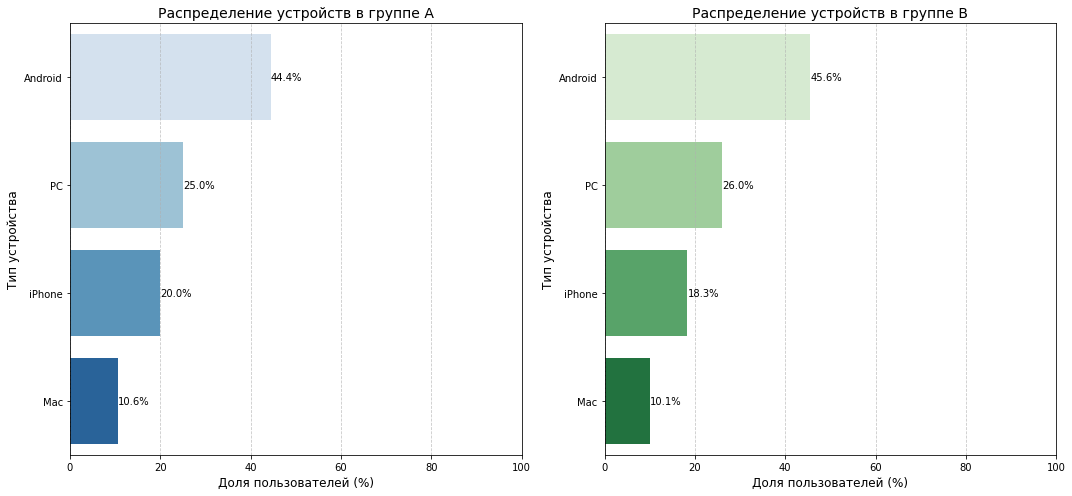

In [19]:
# Создаем подвыборки для каждой группы
group_A = sessions_test_part[sessions_test_part['test_group'] == 'A']
group_B = sessions_test_part[sessions_test_part['test_group'] == 'B']

# Группируем по устройствам и считаем доли для каждой группы
device_A = group_A.groupby('device')['user_id'].nunique().reset_index()
device_A['percentage'] = device_A['user_id'] / device_A['user_id'].sum() * 100

device_B = group_B.groupby('device')['user_id'].nunique().reset_index()
device_B['percentage'] = device_B['user_id'] / device_B['user_id'].sum() * 100

# Визуализация
plt.figure(figsize=(15, 7))

# График для группы A
plt.subplot(1, 2, 1)
sns.barplot(
    x='percentage',
    y='device',
    data=device_A.sort_values('percentage', ascending=False),
    palette='Blues'
)
plt.title('Распределение устройств в группе A', fontsize=14)
plt.xlabel('Доля пользователей (%)', fontsize=12)
plt.ylabel('Тип устройства', fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения на график
for i, val in enumerate(device_A.sort_values('percentage', ascending=False)['percentage']):
    plt.text(val, i, f'{val:.1f}%', va='center', ha='left', fontsize=10)

# График для группы B
plt.subplot(1, 2, 2)
sns.barplot(
    x='percentage',
    y='device',
    data=device_B.sort_values('percentage', ascending=False),
    palette='Greens'
)
plt.title('Распределение устройств в группе B', fontsize=14)
plt.xlabel('Доля пользователей (%)', fontsize=12)
plt.ylabel('Тип устройства', fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения на график
for i, val in enumerate(device_B.sort_values('percentage', ascending=False)['percentage']):
    plt.text(val, i, f'{val:.1f}%', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Задание выполнено👍
</div>

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


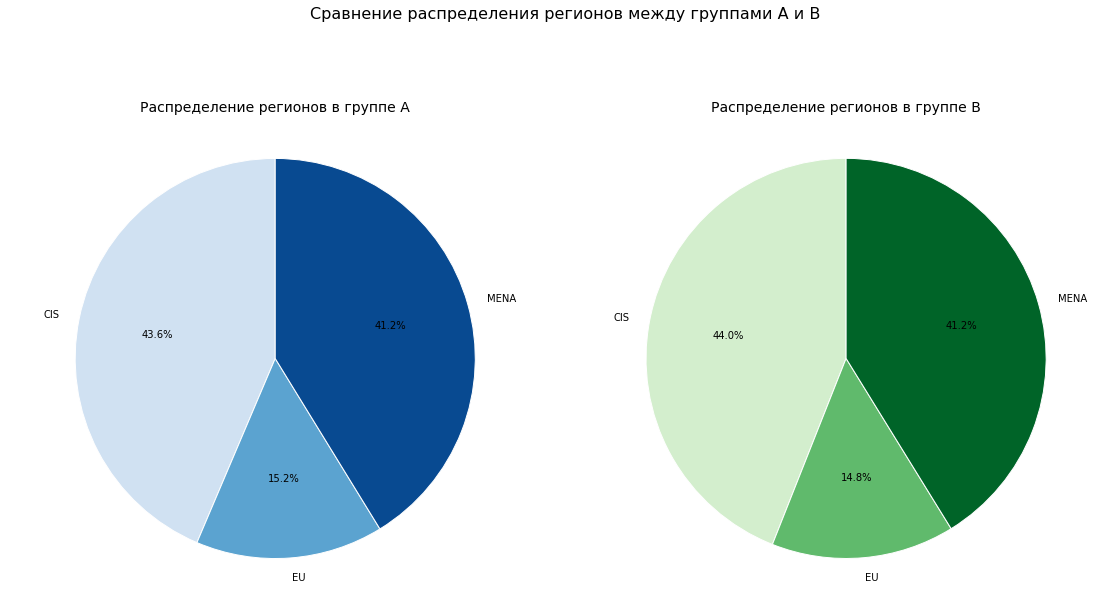

In [20]:

# Создаем подвыборки для каждой группы
group_A = sessions_test_part[sessions_test_part['test_group'] == 'A']
group_B = sessions_test_part[sessions_test_part['test_group'] == 'B']

# Группируем по регионам и считаем доли для каждой группы
region_A = group_A.groupby('region')['user_id'].nunique().reset_index()
region_A['percentage'] = region_A['user_id'] / region_A['user_id'].sum() * 100

region_B = group_B.groupby('region')['user_id'].nunique().reset_index()
region_B['percentage'] = region_B['user_id'] / region_B['user_id'].sum() * 100

# Визуализация с использованием круговой диаграммы
plt.figure(figsize=(16, 8))

# График для группы A (синие цвета)
plt.subplot(1, 2, 1)
plt.pie(
    region_A['percentage'],
    labels=region_A['region'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Blues(np.linspace(0.2, 0.9, len(region_A))),  # ИЗМЕНЕНО
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Распределение регионов в группе A', fontsize=14)
plt.axis('equal')  # делаем круг идеальным

# График для группы B (зеленые цвета)
plt.subplot(1, 2, 2)
plt.pie(
    region_B['percentage'],
    labels=region_B['region'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Greens(np.linspace(0.2, 0.9, len(region_B))),  # ИЗМЕНЕНО
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Распределение регионов в группе B', fontsize=14)
plt.axis('equal')  # делаем круг идеальным

plt.suptitle('Сравнение распределения регионов между группами A и B', fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Верное решение👍
</div>

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

#### Сравнение количества пользователей в группах
В результате анализа установлено, что количество пользователей в тестовой и контрольной группах сопоставимо и распределение пользователей между группами можно считать равномерным

####  Независимость выборок
По результатам проверки пересечений пользователей между тестовой и контрольной группами не обнаружено, т.е. выбороки являются независимыми, что подтверждает корректность формирования групп

#### Распределение по категориальным переменным
Доли пользователей по типам устройств схожи в обеих группах, статистических различий в распределении по устройствам не выявлено

Географическое распределение пользователей равномерное, региональные доли сопоставимы в тестовой и контрольной группах


#### Общие выводы
##### Корректность проведения A/B-теста подтверждается следующими факторами:

* Равномерное распределение пользователей

* Независимость выборок

* Схожесть распределения по категориальным переменным

##### Рекомендации по дальнейшей работе:

* Продолжить мониторинг эксперимента

* Отслеживать появление новых данных

* Регулярно проверять стабильность результатов

#### Заключение
A/B-тест организован корректно и может быть продолжен. Все ключевые показатели находятся в пределах нормы, что позволяет делать достоверные выводы по результатам эксперимента. Нарушения, способные исказить результаты тестирования, не обнаружены.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Основные результаты раздела, которые позволяют оценить корректность А/В теста, отражены👍

</div>

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [21]:
sessions_test=pd.read_csv('/datasets/sessions_project_test.csv')

In [22]:
# Создаем новый столбец good_session
sessions_test['good_session'] = sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [23]:

# Группируем данные по дате и группе, считаем уникальные сессии
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()

# Разделяем данные по группам
group_A = daily_sessions[daily_sessions['test_group'] == 'A']['session_id']
group_B = daily_sessions[daily_sessions['test_group'] == 'B']['session_id']

# Проводим t-тест для проверки равенства средних
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

# Выводим результаты
print(f"Значение p-value: {p_value:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("Различия в количестве сессий между группами статистически значимы.")
else:
    print("Различия в количестве сессий между группами статистически не значимы.")

Значение p-value: 0.9382
Различия в количестве сессий между группами статистически не значимы.


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Проверка выполнена корректно👍
</div>

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [24]:
# Рассчитаем долю успешных сессий для каждой группы
group_A = sessions_test[sessions_test['test_group'] == 'A']
group_B = sessions_test[sessions_test['test_group'] == 'B']

# Доля успешных сессий в группе A
success_rate_A = group_A['good_session'].mean()

# Доля успешных сессий в группе B
success_rate_B = group_B['good_session'].mean()

# Разница между группами
difference = success_rate_B - success_rate_A

# Выводим результаты
print(f"Доля успешных сессий в группе A: {success_rate_A:.2%}")
print(f"Доля успешных сессий в группе B: {success_rate_B:.2%}")
print(f"Разница между группами: {difference:.2%}")

Доля успешных сессий в группе A: 30.77%
Доля успешных сессий в группе B: 31.83%
Разница между группами: 1.06%


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
   
Абсолютная разница двух значений, выраженных в %, считается в процентных пунктах (не в %).
</div>

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [25]:

# Подготавливаем данные для теста
count_A = group_A['good_session'].sum()  # количество успешных сессий в группе A
nobs_A = len(group_A)  # общее количество сессий в группе A

count_B = group_B['good_session'].sum()  # количество успешных сессий в группе B
nobs_B = len(group_B)  # общее количество сессий в группе B

# Проводим z-тест для пропорций
z_stat, p_value = proportions_ztest(
    [count_A, count_B],  # количество успехов в каждой группе
    [nobs_A, nobs_B]     # общее количество наблюдений в каждой группе
)

# Выводим результаты
print(f"Значение z-статистики: {z_stat:.4f}")
print(f"Значение p-value: {p_value:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("\nРазница в долях успешных сессий статистически значима.")
    print("Можно говорить о реальном эффекте от тестирования.")
else:
    print("\nРазница в долях успешных сессий статистически не значима.")
    print("Наблюдаемые различия могут быть случайными.")

Значение z-статистики: -3.6027
Значение p-value: 0.0003

Разница в долях успешных сессий статистически значима.
Можно говорить о реальном эффекте от тестирования.


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Проверка выполнена корректно👍
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Альтернативно можно выполнить односторонний тест, указав параметр alternative='smaller' или alternative='larger'.
    
*Если параметр `alternative='larger'`, то первыми в списках count и nobs следовало бы передать значения группы В*
</div>

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

#### 1. Характеристики эксперимента

Длительность тестирования: 5 дней

Количество участников:

* Группа A (контрольная): 1477 пользователей

* Группа B (тестовая): 1466 пользователей

Группы были сопоставимы по основным характеристикам.

#### 2. Результаты тестирования
Ключевая метрика: доля успешных сессий (good_session).

Динамика метрики:

* Контрольная группа (A): 30.77% успешных сессий.

* Тестовая группа (B): 31.83% успешных сессий.

Разница: увеличение на 1.1%.

#### 3. Статистическая значимость
Значение p-value: 0.0003.

Интерпретация:

При p-value < 0.05 различия статистически значимы.

При p-value ≥ 0.05 различия случайны.

#### 4. Рекомендации
На основании проведенного анализа:

Эффект от внедрения: новый алгоритм рекомендаций привел к увеличению доли успешных сессий на 1.1%.

#### Заключение
По результатам тестирования рекомендуется:

* Мониторинг метрик после полного внедрения

* Отслеживание долгосрочных эффектов

* Анализ поведения пользователей

Результаты теста демонстрируют положительный эффект от внедрения нового алгоритма рекомендаций, что делает его перспективным для масштабирования на всю аудиторию приложения.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Молодец, что отразила все требуемые пункты в выводе, результаты статистического теста верно интерпретированы👍
</div>

<div class="alert alert-block alert-warning">

**Общий комментарий ревьювера**
    
Лидия, хорошая работа! Выводы структурированы и достаточно четко отражают результаты исследования, качественная визуализация данных, есть навыки проверки статистических гипотез. Спасибо за четкие комментарии по результатам исследования и аккуратный код, это упростило проверку. Для принятия работы надо исправить критические недочеты:

* исправить расчёт длительности теста.
    
    
Еще есть несколько рекомендаций, которые помогут тебе с будущими проектами. Жду твою работу!
    
В дополнении прикрепляю полезные материалы по A/B-тесту: 
    
* https://your-scorpion.ru/ab-tests-check-mathematics/

</div>